# Machine Learning

# **Module 1 – Descriptive Statistics and Distributions**

## Part A – Central Tendency and Spread

### Answer - 01

Marks: [50, 60, 65, 70, 75, 80, 85, 90]
Mean: 71.875
Median: 72.5
Mode: 50 (appears 1 times.)


Replaced Marks (90 with 900): [50, 60, 65, 70, 75, 80, 85, 900]
Mean with Outliers: 173.125
Median with Outliers (unchanged): 72.5




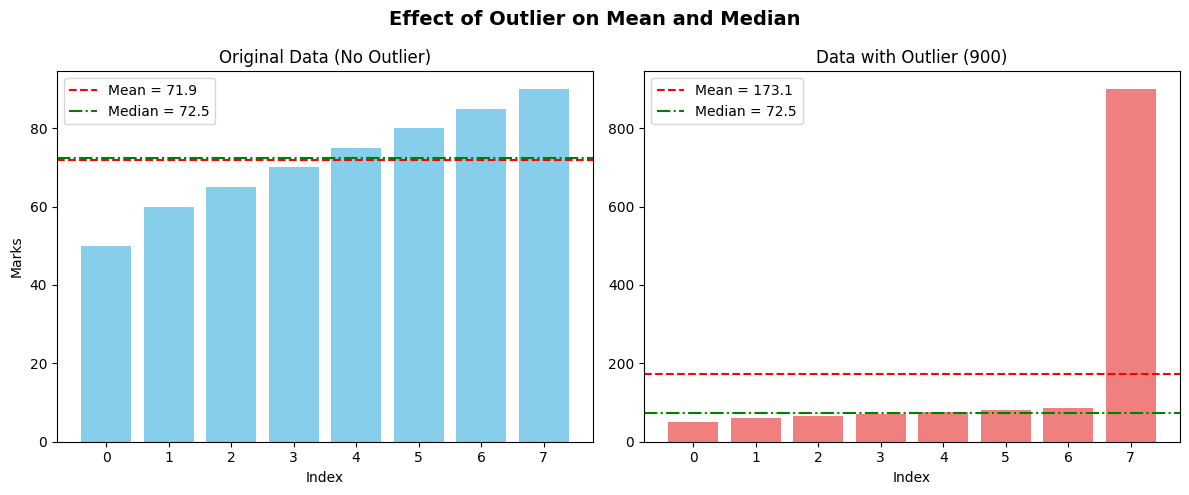

In [ ]:
from types import new_class
# Marks: 50, 60, 65, 70, 75, 80, 85, 90
# Find Central Tendency.

import numpy as np
import pandas as pd
from scipy import stats

marks = [50, 60, 65, 70, 75, 80, 85, 90]
marks = pd.Series(marks)
print(f"Marks: {marks.tolist()}")
original_mean = np.mean(marks)
original_median = np.median(marks)
print(f"Mean: {original_mean}")
print(f"Median: {original_median}")
# Find mode using scipy.stats, since NumPy has no np.mode()
mode_result = stats.mode(marks, keepdims = True)
print(f"Mode: {mode_result.mode[0]} (appears {mode_result.count[0]} times.)")

# Replace 90 with 900 and recompute mean. Explain the effect of outliers.

replaced_marks = marks.replace(90, 900).tolist()
print(f"\n\nReplaced Marks (90 with 900): {replaced_marks}")
new_mean = np.mean(replaced_marks)
new_median = np.median(replaced_marks)
print(f"Mean with Outliers: {new_mean}")
print(f"Median with Outliers (unchanged): {new_median}\n\n")

# --- Visualization ---

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Original Data
axes[0].bar(range(len(marks)), marks, color='skyblue')
axes[0].axhline(original_mean, color='red', linestyle='--', label=f'Mean = {original_mean:.1f}')
axes[0].axhline(original_median, color='green', linestyle='-.', label=f'Median = {original_median:.1f}')
axes[0].set_title("Original Data (No Outlier)")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Marks")
axes[0].legend()

# Plot 2: With Outlier
axes[1].bar(range(len(replaced_marks)), replaced_marks, color='lightcoral')
axes[1].axhline(new_mean, color='red', linestyle='--', label=f'Mean = {new_mean:.1f}')
axes[1].axhline(new_median, color='green', linestyle='-.', label=f'Median = {new_median:.1f}')
axes[1].set_title("Data with Outlier (900)")
axes[1].set_xlabel("Index")
axes[1].legend()

plt.suptitle("Effect of Outlier on Mean and Median", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# Replaceing 90 with an extremely high value like 900 drastically increases the mean Value, so we can say that mean is affected by outliers.
# But on the other hand, Median remain unchanged, so we can say that median is not affected by outliers.

### Answer - 02

In [ ]:
# Temperatures (°C): 29, 31, 33, 33, 32, 31, 30
# Calculate variance and standard deviation.

import numpy as np
import pandas as pd

temperature = [29, 31, 33, 33, 32, 31, 30]
temperature = pd.Series(temperature)
print(f"Temperature: {temperature.tolist()}")
print("\nvariance and standard deviation for Population")
print(f"Variance: {np.var(temperature)}")
print(f"Standard Deviation: {np.std(temperature)}")
print("\nvariance and standard deviation for Sample")
print(f"Variance: {np.var(temperature, ddof = 1)}")
print(f"Standard Deviation: {np.std(temperature, ddof = 1)}")

# Which measure is easier to interpret and why?
# Standard Deviation is easiar to interpret, because it's in same unit as data.



Temperature: [29, 31, 33, 33, 32, 31, 30]
variance and standard deviation for Population
Variance: 1.9183673469387752
Standard Deviation: 1.3850513878332367

variance and standard deviation for Sample
Variance: 2.2380952380952377
Standard Deviation: 1.4960264830861911


## Part B – Percentiles, IQR and Z-Score

### Answer - 03

Cat Weights: [2.5, 3.0, 3.2, 3.3, 3.4, 3.5, 3.6, 3.9, 4.0, 4.5]
25th Percentile (Q1): 3.225
50th Percentile (Q2): 3.45
75th Percentile (Q3): 3.825
Inter Quartile Range (IQR): 0.6000000000000001
Lower Fence: 2.325
Upper Fence: 4.7250000000000005
Outliers: []



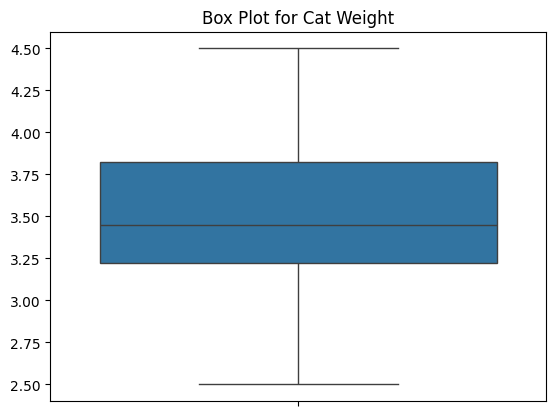

In [ ]:
# 3. Cat weights (kg): 2.5, 3.0, 3.2, 3.3, 3.4, 3.5, 3.6, 3.9, 4.0, 4.5
# Find P25, P50, P75 and IQR. Mark possible outliers.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cat_weight = [2.5, 3.0, 3.2, 3.3, 3.4, 3.5, 3.6, 3.9, 4.0, 4.5]
cat_weight = pd.Series(cat_weight)
print(f"Cat Weights: {cat_weight.tolist()}")

p25 = np.percentile(cat_weight, 25)
p50 = np.percentile(cat_weight, 50)
p75 = np.percentile(cat_weight, 75)
iqr = p75 - p25
print(f"25th Percentile (Q1): {p25}")
print(f"50th Percentile (Q2): {p50}")
print(f"75th Percentile (Q3): {p75}")
print(f"Inter Quartile Range (IQR): {iqr}")

lower_fence = p25 - 1.5 * iqr
upper_fence = p75 + 1.5 * iqr
print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")

outliers = cat_weight[(cat_weight < lower_fence) | (cat_weight > upper_fence)]
print(f"Possible Outliers: {outliers.tolist()}\n")

sns.boxplot(cat_weight)
plt.title("Box Plot for Cat Weight")
plt.show()

### Answer - 04

In [ ]:
# 4. Given μ = 50, σ = 10

# Find Z for x = 65
mean = 50
std_dev = 10
x = 65
z_score = (x - mean) / std_dev
print(f"Z-Score (for x = 65): {z_score}")

# interpretation
if z_score > 0:
    print("x is above the mean.")
    print(f"x is {z_score} standard deviations above the mean.")
elif z_score < 0:
    print("x is below the mean.")
    print(f"x is {z_score} standard deviations below the mean.")
else:
    print("x is equal to the mean.")
    print(f"x is {z_score} standard deviations from the mean.")

# For Z = −2.5, find x.
z = -2.5
x = z * std_dev + mean
print(f"\nx (for Z = -2.5): {x}")

Z-Score (for x = 65): 1.5
x is above the mean.
x is 1.5 standard deviations above the mean.

x (for Z = -2.5): 25.0


# **Module 2 – Probability Basics for ML**

## Part A – Basic Probability

### Answer - 01

Probability of A: 0.4
Probability of B: 0.5
Probability of A intersection B: 0.2
Probability of A given B: 0.4



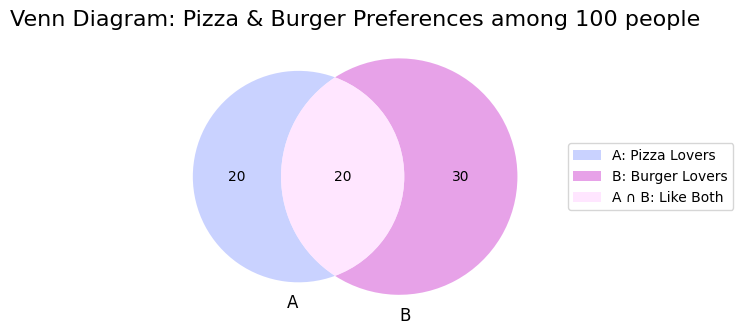

In [ ]:
# In a survey of 100 people:
# 40 like pizza (A)
# 50 like burgers (B)
# 20 like both (A ∩ B)

#  Find P(A), P(B), P(A ∩ B), and P(A | B).
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

total = 100
like_pizza = 40
like_burger = 50
like_both = 20

prob_A = like_pizza/total
prob_B = like_burger/total
prob_A_intsec_B = like_both/total
prob_A_given_B = prob_A_intsec_B / prob_B

print(f"Probability of A: {prob_A}")
print(f"Probability of B: {prob_B}")
print(f"Probability of A intersection B: {prob_A_intsec_B}")
print(f"Probability of A given B: {prob_A_given_B}\n")

plt.figure(figsize=(6,6))
venn = venn2(subsets=(like_pizza - like_both, like_burger - like_both, like_both),
             set_colors=('#B3BFFF', '#DD7BDF'),
             alpha=0.7
             )

plt.title("Venn Diagram: Pizza & Burger Preferences among 100 people",fontsize=16)
plt.legend(
    ["A: Pizza Lovers", "B: Burger Lovers", "A ∩ B: Like Both"],
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),
    frameon=True
)
plt.tight_layout()
plt.show()

## Part B – Conditional Probability and Bayes

### Answer - 02

In [ ]:
# Email dataset of 1 000 mails:
# 100 spam (S)
# 40 of these contain “free” (F)
# 60 non-spam also contain “free”

total_emails = 1000
spam = 100
spam_with_free = 40
non_spam_with_free = 60

# spam_with_notfree = 60
# non_spam = 900
# non_spam_not_free = 840

prob_spam = spam / total_emails
prob_free = (spam_with_free + non_spam_with_free)/total_emails
prob_free_given_spam = spam_with_free / spam
prob_spam_given_free = prob_free_given_spam * prob_spam / prob_free

print(f"Probability of Spam: {prob_spam}")
print(f"Probability of Free: {prob_free}")
print(f"Probability of Free given Spam: {prob_free_given_spam}")
print(f"Probability of Spam given Free: {prob_spam_given_free:.2f}") #  Compute P(S | F) using Bayes’ Theorem →

#  Explain what this means for a spam filter.
print("\nInterpretation:")
print("If an email contains the word 'free', the spam filter can assume there’s a 40% chance it’s spam.\nThis means 'free' is not a perfect spam indicator, since 60% of emails with 'free' are actually not spam.\nA spam filter would need additional features or words to improve accuracy.")

Probability of Spam: 0.1
Probability of Free: 0.1
Probability of Free given Spam: 0.4
Probability of Spam given Free: 0.40

Interpretation:
If an email contains the word 'free', the spam filter can assume there’s a 40% chance it’s spam.
This means 'free' is not a perfect spam indicator, since 60% of emails with 'free' are actually not spam.
A spam filter would need additional features or words to improve accuracy.


### Answer - 03

In [ ]:
# Disease example:
# P(Disease) = 1 / 10 000
# P(+ | D) = 0.99
# P(− | ¬D) = 0.99

# Find P(D | +) and discuss the base-rate effect.


## Part C – Confusion Matrix and Performance Metrics

### Task 1:

In [ ]:
# Compute:

Total = 1000
TP = 120
TN = 770
FP = 80
FN = 30
# Accuracy
print(f"Accuracy: {(TP + TN) / Total}")
# Precision
print(f"Precision: {TP / (TP + FP)}")
# Recall
print(f"Recall: {TP / (TP + FN)}")
# F1
print(f"F1: {2 * TP / (2 * TP + FP + FN)}")
# Specity
print(f"Specificity: {TN / (TN + FP)}")
# NPV
print(f"NPV: {TN / (TN + FN)}")
# Prevalence
print(f"Prevalence: {(TP + FN) / Total}")

#  Explain what each metric tells you about model behavior.


Accuracy: 0.89
Precision: 0.6
Recall: 0.8
F1: 0.6857142857142857
Specificity: 0.9058823529411765
NPV: 0.9625
Prevalence: 0.15


### Task 2:

In [ ]:
#  A dataset of 10000 samples has only 2 % positives. The model predicts everything as negative.
# Write the confusion matrix.
# Compute Accuracy, Precision, Recall, F1, Specificity.
# Why is Accuracy misleading in this case?
# Which metric would be more appropriate for imbalanced data and why?

total = 10000
FN = 200
TN = 9800
TP = 0
FP = 0